In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Project-X-Lip-Reading

/content/drive/MyDrive/Project-X-Lip-Reading


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, MaxPooling3D
from tensorflow.keras.layers import Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
import pickle

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/X_train.pkl', 'rb') as f:
   X_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/y_train.pkl', 'rb') as f:
   y_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/X_test.pkl', 'rb') as f:
   X_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/y_test.pkl', 'rb') as f:
   y_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/X_val.pkl', 'rb') as f:
   X_val = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/y_val.pkl', 'rb') as f:
   y_val = pickle.load(f)

In [ ]:
model = Sequential()

model.add(Conv3D(32, (3, 3, 3), strides = 1, input_shape=(28, 100, 100, 1), activation='relu', padding='valid'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(64, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Reshape((128, 1*10*10)))

model.add(LSTM(32, return_sequences=True))
model.add(Dropout(.5))

model.add((Flatten()))

model.add(Dense(2048, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()
# plot_model(model, to_file='structure.png', show_shapes=True, show_layer_names=True)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                      │ (None, 20, 98, 98, 32)      │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d (MaxPooling3D)         │ (None, 10, 49, 49, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_1 (Conv3D)                    │ (None, 8, 47, 47, 64)       │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_1 (MaxPooling3D)       │ (None, 4, 23, 23, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_2 (Conv3D)                    │ (None, 2, 21, 21, 128)      │         221,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_2 (MaxPooling3D)       │ (None, 1, 10, 10, 128)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 128, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128, 32)             │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │       8,390,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,793,674 (41.17 MB)

 Trainable params: 10,793,674 (41.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=4)

In [ ]:
import time
t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size = 8, callbacks = [early_stop])
t2 = time.time()
print(f"Training time : {t2 - t1} sec")

Epoch 1/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.2156 - loss: 1.9194 - val_accuracy: 0.3571 - val_loss: 1.1946
Epoch 2/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.3540 - loss: 1.2070 - val_accuracy: 0.3571 - val_loss: 1.1175
Epoch 3/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.2998 - loss: 1.1537 - val_accuracy: 0.3571 - val_loss: 1.0723
Epoch 4/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.4025 - loss: 1.1720 - val_accuracy: 0.5000 - val_loss: 0.9742
Epoch 5/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.4864 - loss: 0.9480 - val_accuracy: 0.7143 - val_loss: 0.6922
Epoch 6/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.7919 - loss: 0.5415 - val_accuracy: 0.7143 - val_loss: 0.6906
Epoch 7/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.7656 - loss: 0.7444 - val_accuracy: 0.7143 - val_loss: 0.6373
Epoch 8/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.8668 - loss: 0.5449 - val_accuracy: 0.8571 - 

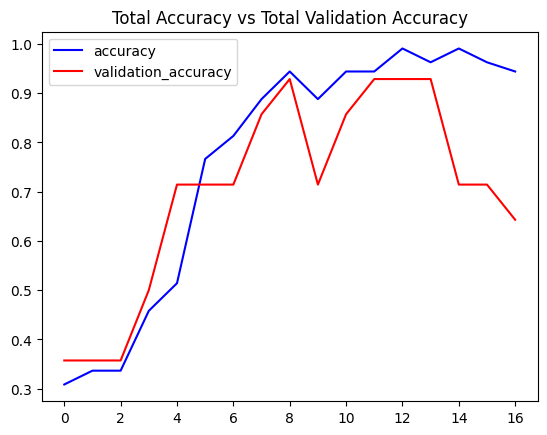

In [ ]:
import matplotlib.pyplot as plt
# Visualizing the training and validation accuracy
plt.plot(history.history['accuracy'], 'blue', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'red', label = 'validation_accuracy')
plt.title("Total Accuracy vs Total Validation Accuracy")
plt.legend()
plt.show()

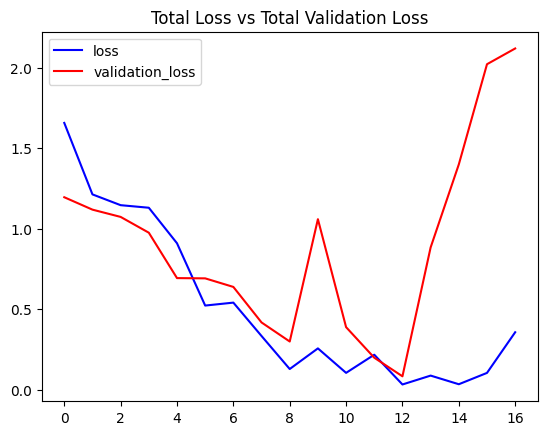

In [ ]:
# Visualizing the training and validation loss
plt.plot(history.history['loss'], 'blue', label = 'loss')
plt.plot(history.history['val_loss'], 'red', label = 'validation_loss')
plt.title("Total Loss vs Total Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.6923 - loss: 1.5904
Test Accuracy: 0.692307710647583
